In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
df_trip = pd.read_csv('/Users/tanchaud/CAB_Berlin/Project_3/Bike-Sharing-Dataset/2011-capitalbikeshare-tripdata.csv')

In [110]:
df_trip.head(3)

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,3548,2011-01-01 00:01:29,2011-01-01 01:00:37,31620,5th & F St NW,31620,5th & F St NW,W00247,Member
1,346,2011-01-01 00:02:46,2011-01-01 00:08:32,31105,14th & Harvard St NW,31101,14th & V St NW,W00675,Casual
2,562,2011-01-01 00:06:13,2011-01-01 00:15:36,31400,Georgia & New Hampshire Ave NW,31104,Adams Mill & Columbia Rd NW,W00357,Member


In [111]:
df_trip.isna().sum()
df_trip.dtypes

Duration                 int64
Start date              object
End date                object
Start station number     int64
Start station           object
End station number       int64
End station             object
Bike number             object
Member type             object
dtype: object

In [112]:
df_trip['Start date'] = pd.to_datetime(df_trip['Start date'])

df_trip['End date'] = pd.to_datetime(df_trip['End date'])

In [113]:
df_trip['Start Date'] = pd.to_datetime(df_trip['Start date']).dt.date
df_trip['Start Time'] = pd.to_datetime(df_trip['Start date']).dt.time

In [114]:
df_trip['Start Date'] = pd.to_datetime(df_trip['Start Date'])

In [115]:
df_trip = df_trip.set_index(df_trip['Start Date'])

In [169]:
df_trip.head(3)

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,Start Date,Start Time
Start Date,,,,,,,,,,,
2011-01-01,3548,2011-01-01 00:01:29,2011-01-01 01:00:37,31620,5th & F St NW,31620,5th & F St NW,W00247,Member,2011-01-01,00:01:29
2011-01-01,346,2011-01-01 00:02:46,2011-01-01 00:08:32,31105,14th & Harvard St NW,31101,14th & V St NW,W00675,Casual,2011-01-01,00:02:46
2011-01-01,562,2011-01-01 00:06:13,2011-01-01 00:15:36,31400,Georgia & New Hampshire Ave NW,31104,Adams Mill & Columbia Rd NW,W00357,Member,2011-01-01,00:06:13


In [198]:
len(df_trip['End station'].unique())

144

## Start Stations

In [ ]:
df_trip.loc[df_trip['Start station number'] == 31200] ### MOST POPULAR STATION IN 2011

In [167]:
popular_stations = df_trip.groupby("Start station number").size()      
popular_stations = popular_stations.sort_values()
popular_stations.tail(10)

Start station number
31205    23574
31203    23871
31110    23971
31229    24074
31101    25222
31214    28160
31104    29964
31623    32058
31201    32884
31200    49093
dtype: int64

In [172]:
popular_start_stations = df_trip.groupby("Start station").size()      
popular_start_stations = popular_start_stations.sort_values()
top_ten_stations = popular_start_stations.tail(10)
top_ten_stations

Start station
21st & I St NW                          23574
14th & Rhode Island Ave NW              23871
20th St & Florida Ave NW                23971
New Hampshire Ave & T St NW             24074
14th & V St NW                          25222
17th & Corcoran St NW                   28160
Adams Mill & Columbia Rd NW             29964
Columbus Circle / Union Station         32058
15th & P St NW                          32884
Massachusetts Ave & Dupont Circle NW    49093
dtype: int64

Text(0.5, 1.0, 'Top Ten Popular Start Stations in  2011')

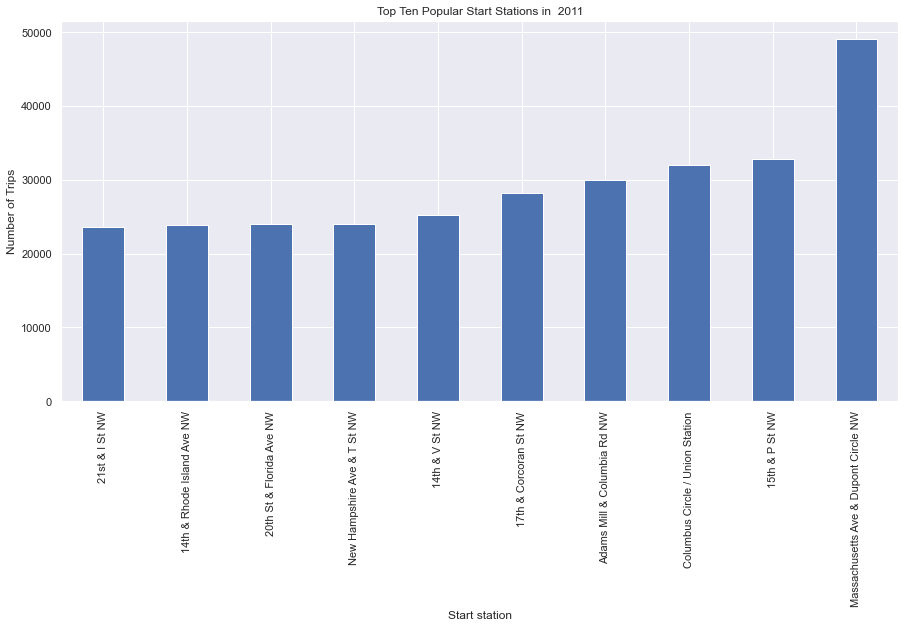

In [199]:
sns.set(rc = {'figure.figsize':(15,7)})
top_ten_stations.plot(kind='bar')
plt.ylabel('Number of Trips')

plt.title('Top Ten Popular Start Stations in  2011')

## End Stations

In [200]:
popular_start_stations = df_trip.groupby("End station").size()      
popular_start_stations = popular_start_stations.sort_values()
top_ten_stations = popular_start_stations.tail(10)
top_ten_stations

End station
USDA / 12th & Independence Ave SW       24281
14th & Rhode Island Ave NW              24525
14th & V St NW                          25139
21st & I St NW                          25283
8th & H St NW                           25384
Adams Mill & Columbia Rd NW             26248
17th & Corcoran St NW                   29103
Columbus Circle / Union Station         32252
15th & P St NW                          36638
Massachusetts Ave & Dupont Circle NW    53910
dtype: int64

Text(0.5, 1.0, 'Top Ten Popular End Stations in  2011')

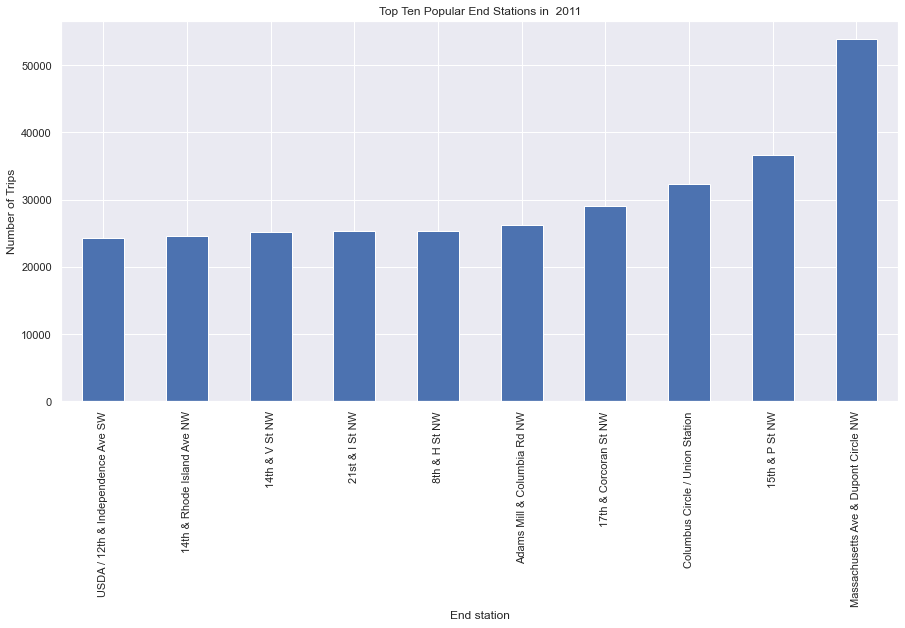

In [201]:
sns.set(rc = {'figure.figsize':(15,7)})
top_ten_stations.plot(kind='bar')
plt.ylabel('Number of Trips')

plt.title('Top Ten Popular End Stations in  2011')

In [ ]:
ax = sns.barplot(x=top_ten_stations.index, y=top_ten_stations.values, hue="sex")